In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("WineDataset/winequality-white.csv", delimiter=";")  
print(df.columns)  
print(df.head())  

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3        

In [3]:
def prepare_data(df):
    #categories
    conditions = [
        (df['quality'] <= 4),
        (df['quality'] > 4) & (df['quality'] <= 7),
        (df['quality'] > 7)
    ]
    choices = [0, 1, 2]  #  0 = low, 1 = medium, 2 = high
    df['quality_category'] = np.select(conditions, choices, default=1)  # Assign default if none match

    #new quality column
    X = df.drop(['quality', 'quality_category'], axis=1).values
    y = df['quality_category'].astype(int).values  # Convert labels to integers
   
    # standardization of  features
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    
    return X, y

def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
        
    indices = np.random.permutation(len(X))
    test_size = int(test_size * len(X))
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

In [4]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def initialize_weights(n_features, n_classes):
    W = np.random.randn(n_features, n_classes) * 0.01
    b = np.zeros((1, n_classes))
    return W, b

def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-9)) / m 
    return loss

def one_hot_encode(y, num_classes):
    m = y.shape[0]
    y_one_hot = np.zeros((m, num_classes))
    y_one_hot[np.arange(m), y] = 1
    return y_one_hot

def compute_gradients(X, y_one_hot, y_pred):
    m = X.shape[0]
    dW = (1 / m) * np.dot(X.T, (y_pred - y_one_hot))
    db = (1 / m) * np.sum(y_pred - y_one_hot, axis=0, keepdims=True)
    return dW, db


In [5]:
def train(X, y, num_classes, learning_rate=0.1, epochs=1500):
    n_samples, n_features = X.shape
    W, b = initialize_weights(n_features, num_classes)
    
    y_one_hot = one_hot_encode(y, num_classes)

    loss_history = []
    
    for epoch in range(epochs):
        logits = np.dot(X, W) + b
        y_pred = softmax(logits)
        
        loss = cross_entropy_loss(y_one_hot, y_pred)
        loss_history.append(loss)
        
        dW, db = compute_gradients(X, y_one_hot, y_pred)
        
        W -= learning_rate * dW
        b -= learning_rate * db
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    
    return W, b, loss_history

def predict(X, W, b):
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)
    return np.argmax(y_pred, axis=1)

In [ ]:
X, y = prepare_data(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# train model
num_classes = 3 #3 types of quality
W, b, loss_history = train(X_train, y_train, num_classes)

Epoch 0, Loss: 1.0990
Epoch 100, Loss: 0.3071
Epoch 200, Loss: 0.2858
Epoch 300, Loss: 0.2796
Epoch 400, Loss: 0.2765
Epoch 500, Loss: 0.2748
Epoch 600, Loss: 0.2736
Epoch 700, Loss: 0.2729
Epoch 800, Loss: 0.2723
Epoch 900, Loss: 0.2719
Epoch 1000, Loss: 0.2716
Epoch 1100, Loss: 0.2714
Epoch 1200, Loss: 0.2713
Epoch 1300, Loss: 0.2711
Epoch 1400, Loss: 0.2710


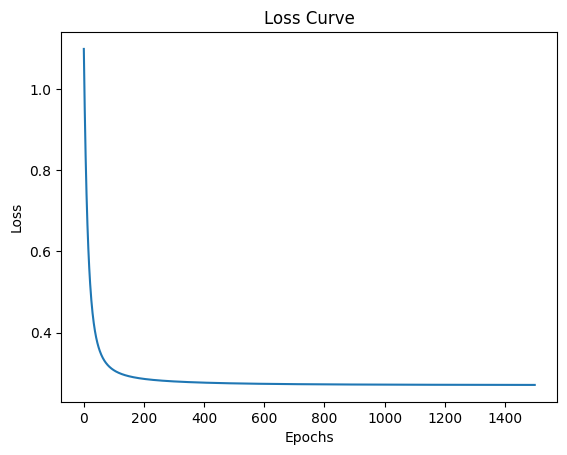

In [7]:
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

In [8]:
y_pred = predict(X_test, W, b)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 93.16%
